Found 6400 files belonging to 4 classes.


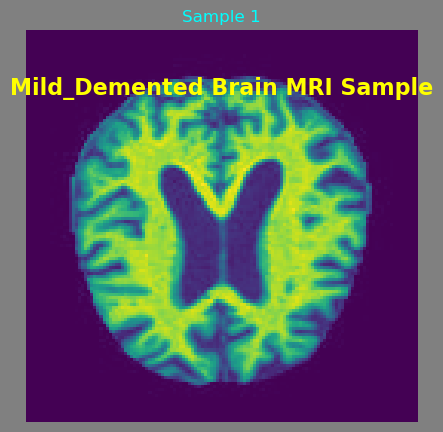

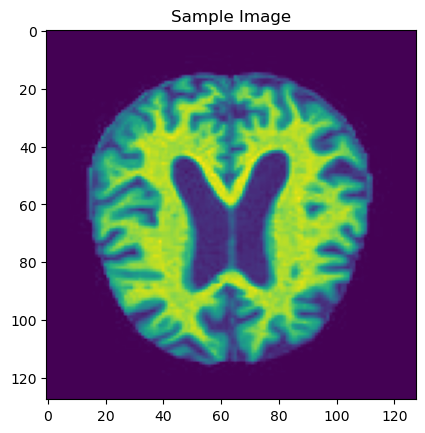

Mean: 68.858642578125, Standard Deviation: 86.16904623934299
Average difference after smoothing: 231.12310791015625


In [6]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
import numpy as np

def sample_bringer(path, target):
    class_path = os.path.join(path, target)
    image_files = [image for image in os.listdir(class_path) if image.endswith(('.jpg', '.jpeg', '.png'))]

    if not image_files:
        print(f"No images found in {class_path}")
        return None

    image_path = os.path.join(class_path, image_files[0])
    img = Image.open(image_path)

    fig, ax = plt.subplots(1, 1, facecolor="gray")
    fig.suptitle(f'{target} Brain MRI Sample', color="yellow", fontsize=16, fontweight='bold', y=0.75)
    
    ax.imshow(img)
    ax.axis('off')
    ax.set_title('Sample 1', color="aqua")

    plt.tight_layout()
    plt.show()

    return img

PATH = 'Dataset'

data = tf.keras.utils.image_dataset_from_directory(PATH,
                                                batch_size = 32,
                                                image_size=(128, 128),
                                                shuffle=True,
                                                seed=42,)

class_names = data.class_names
    
alz_dict = {index: img for index, img in enumerate(data.class_names)}

# Define your functions
def normalize_intensity(image):
    return tf.image.per_image_standardization(image)

def smooth_image(image, sigma=1):
    # Gaussian smoothing (this implementation uses brightness adjustment for illustration; you may want to use a proper Gaussian filter)
    return tf.image.adjust_brightness(image, delta=0.1)

def check_normalization(image):
    mean = np.mean(image)
    std = np.std(image)
    print(f"Mean: {mean}, Standard Deviation: {std}")

def check_smoothing(image, sigma=1):
    smoothed_image = smooth_image(image, sigma)
    difference = np.mean(np.abs(image - smoothed_image))
    print(f"Average difference after smoothing: {difference}")

# Load a sample image from dataset
sample_image = sample_bringer(PATH, class_names[0])  # Replace with your code to load an image

# Visual inspection
plt.imshow(sample_image)
plt.title("Sample Image")
plt.show()

# Check normalization
check_normalization(sample_image)

# Check smoothing
check_smoothing(sample_image)
